In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

In [232]:
import warnings
warnings.filterwarnings('ignore')

In [234]:
bikes_data_2022 = pd.read_csv("dublinbike-historical-data-2022-01.csv")

bikes_data_2022.head()

# https://data.gov.ie/dataset/dublinbikes-api/resource/d4a7a8ef-24d4-4d47-967f-945e4a6a3a7b?inner_span=True - data was collected from here 

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2022-01-01 00:00:04,2021-12-31 23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
1,3,2022-01-01 00:00:04,2021-12-31 23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986
2,4,2022-01-01 00:00:04,2021-12-31 23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298
3,5,2022-01-01 00:00:04,2021-12-31 23:51:48,CHARLEMONT PLACE,40,17,23,OPEN,Charlemont Street,53.3307,-6.26018
4,6,2022-01-01 00:00:04,2021-12-31 23:59:13,CHRISTCHURCH PLACE,20,13,7,OPEN,Christchurch Place,53.3434,-6.27012


In [235]:
bikes_data_2022.tail()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
163694,113,2022-01-31 23:30:03,2022-01-31 23:28:29,MERRION SQUARE SOUTH,40,32,8,OPEN,Merrion Square South,53.3386,-6.24861
163695,114,2022-01-31 23:30:03,2022-01-31 23:22:17,WILTON TERRACE (PARK),40,25,15,OPEN,Wilton Terrace (Park),53.3337,-6.24834
163696,115,2022-01-31 23:30:03,2022-01-31 23:19:21,KILLARNEY STREET,30,13,17,OPEN,Killarney Street,53.3548,-6.24758
163697,116,2022-01-31 23:30:03,2022-01-31 23:24:38,BROADSTONE,30,22,8,OPEN,Broadstone,53.3547,-6.27231
163698,117,2022-01-31 23:30:03,2022-01-31 23:28:01,HANOVER QUAY EAST,40,38,2,OPEN,Hanover Quay East,53.3437,-6.23175


In [152]:
bikes_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163699 entries, 0 to 163698
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   STATION ID             163699 non-null  int64         
 1   TIME                   163699 non-null  datetime64[ns]
 2   LAST UPDATED           163699 non-null  object        
 3   NAME                   163699 non-null  object        
 4   BIKE_STANDS            163699 non-null  int64         
 5   AVAILABLE_BIKE_STANDS  163699 non-null  int64         
 6   AVAILABLE_BIKES        163699 non-null  int64         
 7   STATUS                 163699 non-null  object        
 8   ADDRESS                163699 non-null  object        
 9   LATITUDE               163699 non-null  float64       
 10  LONGITUDE              163699 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 13.7+ MB


In [153]:
bikes_data_2022.describe()

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LATITUDE,LONGITUDE
count,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000
mean,60.979413,32.000128,19.200191,12.741410,53.345687,-6.264389
std,37.757380,7.670569,9.636346,7.932004,0.007647,0.018114
min,2.000000,1.000000,0.000000,0.000000,53.330100,-6.310020
25%,31.000000,29.000000,12.000000,7.000000,53.339800,-6.275230
50%,61.000000,30.000000,19.000000,12.000000,53.345900,-6.262980
75%,90.000000,40.000000,26.000000,18.000000,53.351000,-6.251560
max,507.000000,40.000000,40.000000,40.000000,53.360000,-6.230850


In [174]:
bikes_data_2022['TIME'] = pd.to_datetime(bikes_data_2022['TIME'])

bikes_aggregated = bikes_data_2022.groupby('TIME')['AVAILABLE_BIKES'].sum().reset_index()

bikes_aggregated = bikes_aggregated.sort_values(by='TIME')

bikes_aggregated.head()


,TIME,AVAILABLE_BIKES
0,2022-01-01 00:00:04,1417
1,2022-01-01 00:30:03,1417
2,2022-01-01 01:00:02,1426
3,2022-01-01 01:30:03,1428
4,2022-01-01 02:00:04,1429


In [175]:
bikes_aggregated.size

2972

In [236]:
bikes_aggregated['TIME'] = pd.to_datetime(bikes_aggregated['TIME'])
available_bikes_series_22 = pd.Series(data=bikes_aggregated['AVAILABLE_BIKES'].values, index=bikes_aggregated['TIME'])

available_bikes_series_22

TIME
2022-01-01 00:00:04    1417
2022-01-01 00:30:03    1417
2022-01-01 01:00:02    1426
2022-01-01 01:30:03    1428
2022-01-01 02:00:04    1429
                       ... 
2022-01-31 21:30:02    1423
2022-01-31 22:00:04    1419
2022-01-31 22:30:03    1429
2022-01-31 23:00:04    1438
2022-01-31 23:30:03    1437
Length: 1486, dtype: int64

In [237]:
available_bikes_series_22.size

1486

Text(0, 0.5, 'Available bikes')

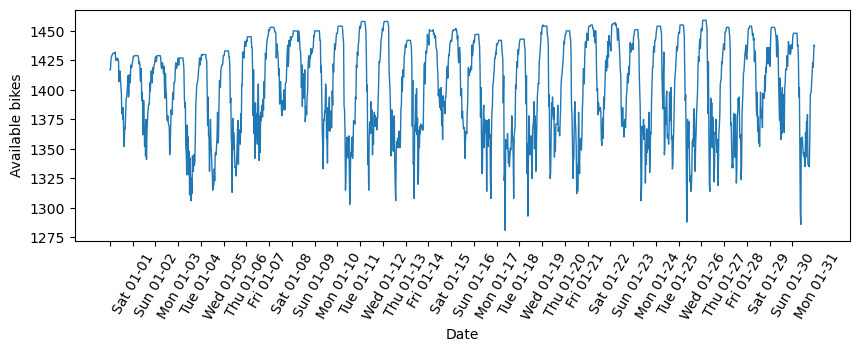

In [240]:
plt.figure(figsize = (10, 3))

xticks = pd.date_range(start = available_bikes_series_22.index.min().normalize(), end = available_bikes_series_22.index.max().normalize(), freq = 'D')

plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation = 60, ha = "left")

plt.plot(available_bikes_series_22, linewidth = 1)
plt.xlabel("Date")
plt.ylabel("Available bikes")

In [241]:
xticks

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

In [243]:
available_bikes_series_22.index.astype("int64").values
available_bikes_series_22.values

array([1417, 1417, 1426, ..., 1429, 1438, 1437], dtype=int64)

In [244]:
available_bikes_series_22.index.astype("int64").values.reshape(-1, 1) 

array([[1640995204000000000],
       [1640997003000000000],
       [1640998802000000000],
       ...,
       [1643668203000000000],
       [1643670004000000000],
       [1643671803000000000]], dtype=int64)

In [382]:
# extract the target values
y = available_bikes_series_22.values

# convert to POSIX time by dividing by 10**9
X = available_bikes_series_22.index.astype("int64").values.reshape(-1, 1) // 10**9

X.shape, y.shape

((1486, 1), (1486,))

In [383]:
print(X[:20])

[[1640995204]
 [1640997003]
 [1640998802]
 [1641000603]
 [1641002404]
 [1641004203]
 [1641006002]
 [1641007803]
 [1641009604]
 [1641011402]
 [1641013203]
 [1641015003]
 [1641016806]
 [1641018603]
 [1641020403]
 [1641022204]
 [1641024004]
 [1641025803]
 [1641027602]
 [1641029402]]


In [331]:
# use the first 700 data points for training and the rest for testing
n_train = 700

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10, 3))

    tick_positions = np.linspace(0, len(X) - 1, len(xticks), dtype=int)

    plt.xticks(tick_positions, xticks.strftime("%a %m-%d"), rotation=90, ha="left")


    plt.plot(range(n_train), y_train, label = "train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = "test")
    plt.plot(range(n_train), y_pred_train, '--', label = "prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "prediction test")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

In [332]:
print(X, y)

[[1640995204]
 [1640997003]
 [1640998802]
 ...
 [1643668203]
 [1643670004]
 [1643671803]] [1417 1417 1426 ... 1429 1438 1437]


In [333]:
len(xticks)

31

In [334]:
len(X)

1486

Test-set R^2: -0.03


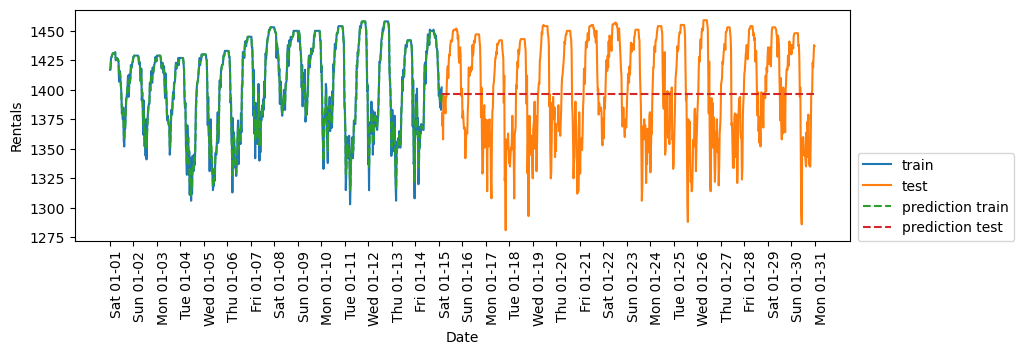

In [335]:
regressor_random_forest = RandomForestRegressor(n_estimators = 100, random_state = 0)

eval_on_features(X, y, regressor)

In [336]:
X_hour = available_bikes_series_22.index.hour.values.reshape(-1, 1)

print(X_hour)

[[ 0]
 [ 0]
 [ 1]
 ...
 [22]
 [23]
 [23]]


Test-set R^2: 0.71


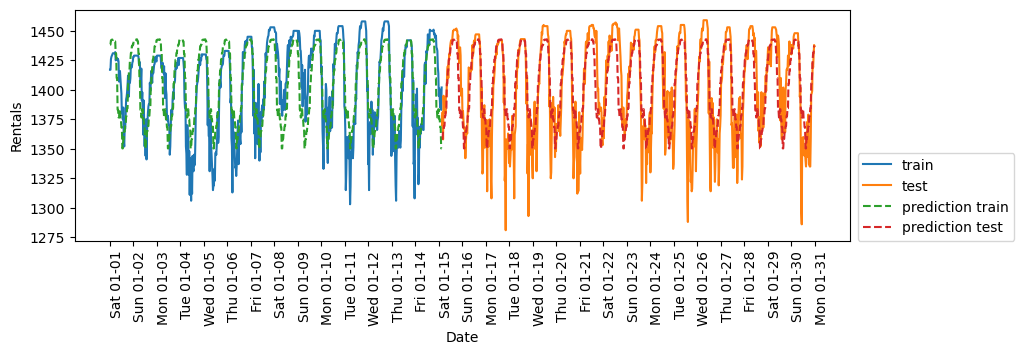

In [337]:
X_hour = available_bikes_series_22.index.hour.values.reshape(-1, 1)

eval_on_features(X_hour, y, regressor_random_forest)

In [338]:
X_day_hour_week = np.hstack([available_bikes_series_22.index.dayofweek.values.reshape(-1, 1), available_bikes_series_22.index.hour.values.reshape(-1, 1)])

print(X_day_hour_week, type(X_hour), y)

[[ 5  0]
 [ 5  0]
 [ 5  1]
 ...
 [ 0 22]
 [ 0 23]
 [ 0 23]] <class 'numpy.ndarray'> [1417 1417 1426 ... 1429 1438 1437]


Test-set R^2: 0.79


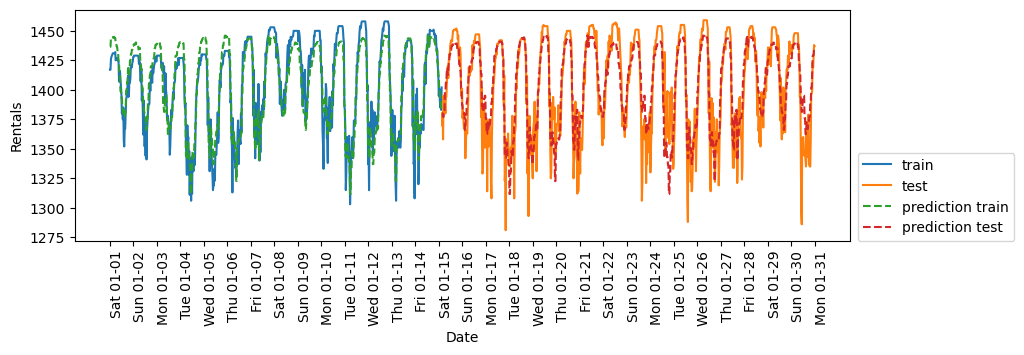

In [339]:
X_day_hour_week = np.hstack([available_bikes_series_22.index.dayofweek.values.reshape(-1, 1), available_bikes_series_22.index.hour.values.reshape(-1, 1)])

eval_on_features(X_day_hour_week, y, regressor_random_forest)

Test-set R^2: 0.15


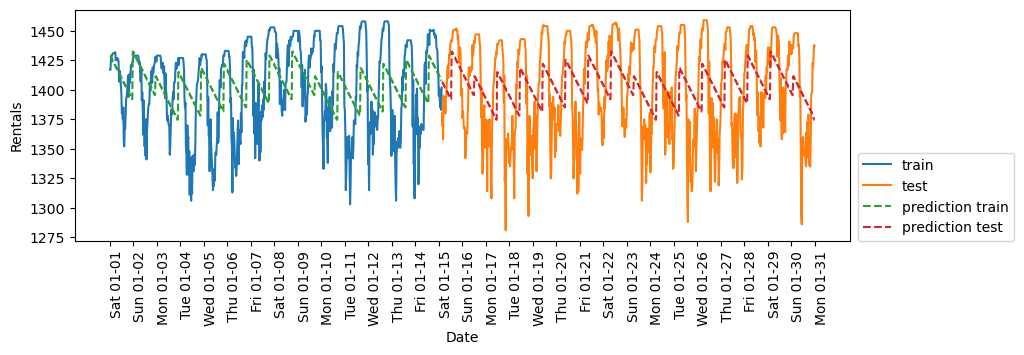

In [340]:
regressor_linear_regression = LinearRegression()

# Call a method eval_on_features() to evaluate R^2 and plot
eval_on_features(X_day_hour_week, y, regressor_linear_regression)

In [341]:
enc = OneHotEncoder()

X_day_hour_week_onehot = enc.fit_transform(X_day_hour_week).toarray()

X_day_hour_week_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

Test-set R^2: 0.73


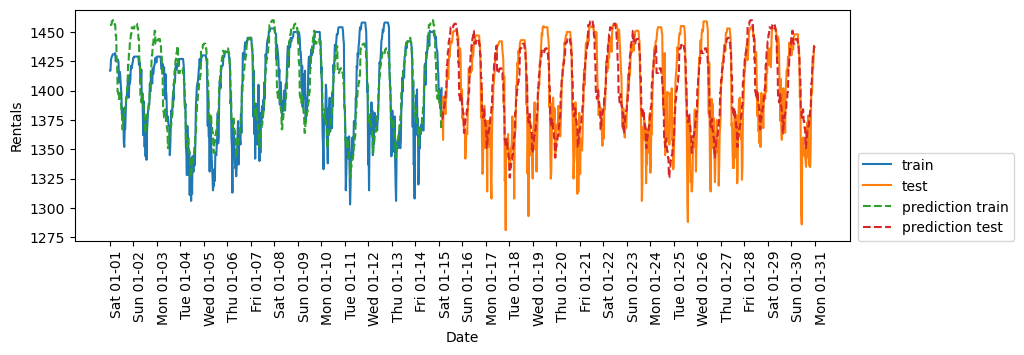

In [342]:
eval_on_features(X_day_hour_week_onehot, y, regressor_linear_regression)

Test-set R^2: 0.74


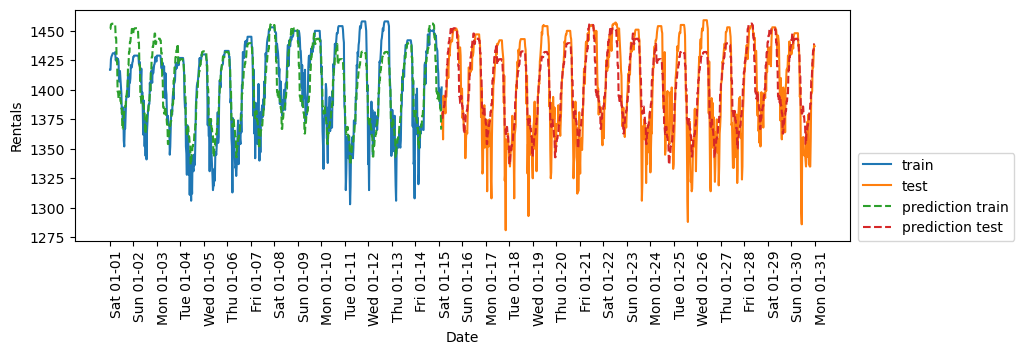

In [343]:
regressor_ridge = Ridge()

eval_on_features(X_day_hour_week_onehot, y, regressor_ridge)

Test-set R^2: 0.79


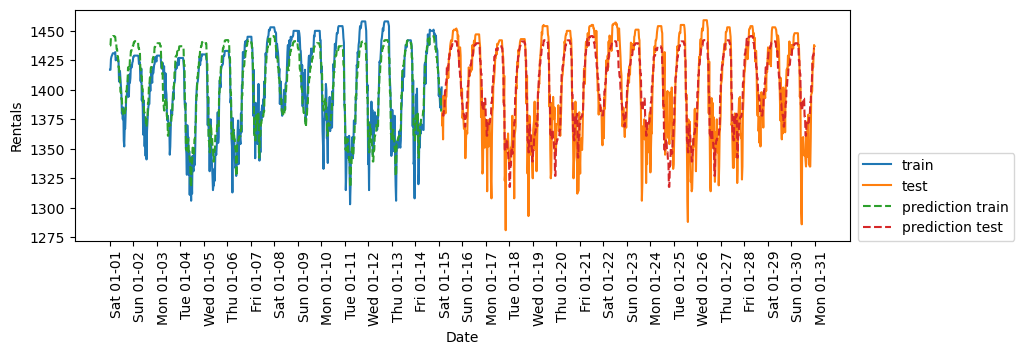

In [381]:
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

X_day_hour_week_onehot_poly = poly_transformer.fit_transform(X_day_hour_week_onehot)

lr_poly = Ridge()

eval_on_features(X_day_hour_week_onehot_poly, y, lr)

In [378]:
def calculate_test_score(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    return regressor.score(X_test, y_test)

In [379]:
test_score_rf = calculate_test_score(X_day_hour_week, y, regressor_random_forest)
test_score_lr = calculate_test_score(X_day_hour_week_onehot, y, regressor_linear_regression)
test_score_lr_poly = calculate_test_score(X_day_hour_week_onehot_poly, y, lr)

In [380]:
models = ['Random Forest', 'Linear Regression', 'Linear Reg w/ Poly Features']

scores = [test_score_rf, test_score_lr, test_score_lr_poly]
results_df = pd.DataFrame({
    'Model': models,
    'R² Score': scores
})

print(results_df)

                         Model  R² Score
0                Random Forest  0.794218
1            Linear Regression  0.734597
2  Linear Reg w/ Poly Features  0.792315


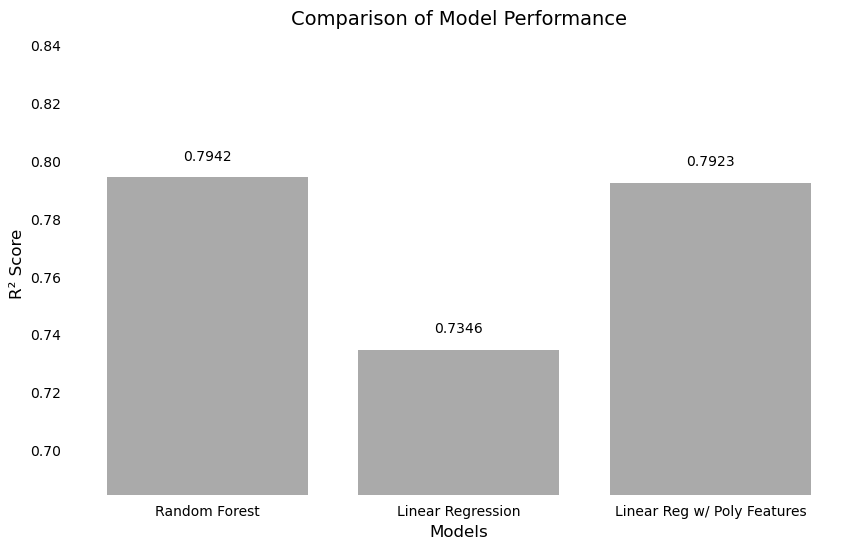

In [372]:
models = ['Random Forest', 'Linear Regression', 'Linear Reg w/ Poly Features']
scores = [test_score_rf, test_score_lr, test_score_lr_poly]

plt.figure(figsize=(10, 6))

bars = plt.bar(models, scores, color='#AAAAAA')

plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Comparison of Model Performance', fontsize=14)
plt.ylim([min(scores) - 0.05, max(scores) + 0.05])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


This visualization focuses on the clarity and readability of the data, adhering to Tufte's principles.

Conclusion:

The Random Forest Regressor is the most effective model among the ones tested, based on the R² score. It's well-suited for this dataset, likely due to its ability to handle complex, non-linear relationships without the need for explicit feature transformation like polynomial expansion.

The performance of Linear Regression improves substantially with polynomial features, suggesting that the relationship between the features and the target variable is not purely linear.

## Old version

In [195]:
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    plt.figure(figsize=(10, 3))

    time_ticks = pd.to_datetime(features.ravel() * 10**9)

    if len(features) > 500:
        tick_spacing = len(features) // 20
    else:
        tick_spacing = 10 
        
    tick_labels = time_ticks[::tick_spacing].strftime('%Y-%m-%d %H:%M')
    plt.xticks(ticks=np.arange(0, len(features), tick_spacing), labels=tick_labels, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

In [196]:
print(X,y)

[[1640995204]
 [1640997003]
 [1640998802]
 ...
 [1643668203]
 [1643670004]
 [1643671803]] [1417 1417 1426 ... 1429 1438 1437]


Test-set R^2: -0.40


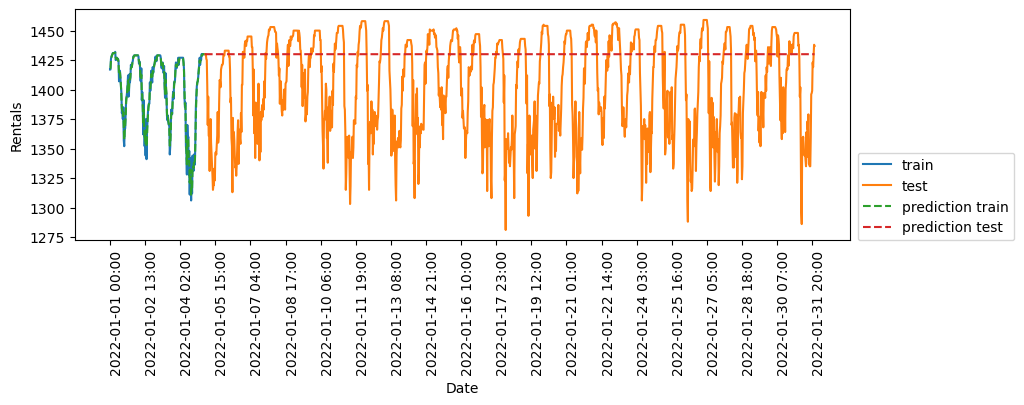

In [197]:

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

eval_on_features(X, y, regressor)

In [158]:
X_hour = available_bikes_series_22.index.hour.values.reshape(-1, 1)

print(X_hour)

[[ 0]
 [ 0]
 [ 1]
 ...
 [22]
 [23]
 [23]]


Test-set R^2: 0.69


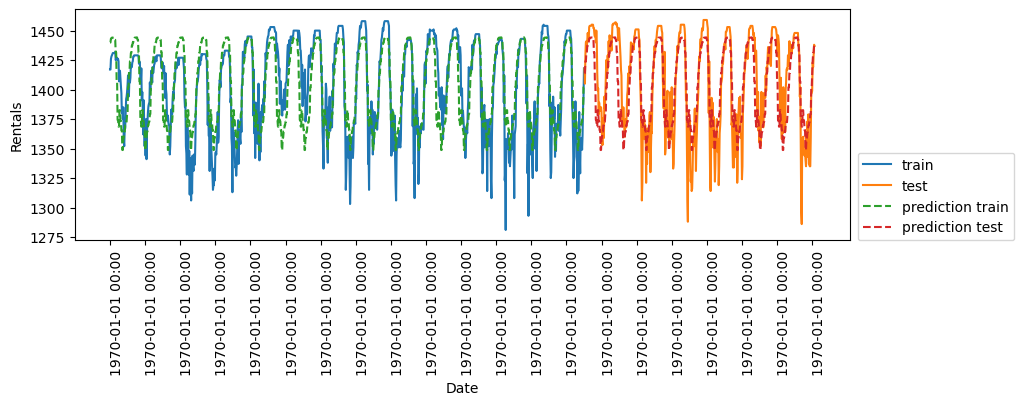

In [159]:
X_hour = available_bikes_series_22.index.hour.values.reshape(-1, 1)

eval_on_features(X_hour, y, regressor)

In [140]:
X_day_hour_week = np.hstack([available_bikes_series_22.index.dayofweek.values.reshape(-1, 1), available_bikes_series_22.index.hour.values.reshape(-1, 1)])

print(X_day_hour_week, type(X_hour), y)

[[ 5  0]
 [ 5  0]
 [ 5  1]
 ...
 [ 0 22]
 [ 0 23]
 [ 0 23]] <class 'numpy.ndarray'> [1417 1417 1426 ... 1429 1438 1437]


In [141]:
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    plt.figure(figsize=(10, 3))

    if len(features) > 500:
        tick_spacing = len(features) // 20
    else:
        tick_spacing = max(1, len(features) // 50) 
    days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    tick_labels = [f'{days[day]} {hour}:00' for day, hour in features[::tick_spacing]]

    plt.xticks(ticks=np.arange(0, len(features), tick_spacing), labels=tick_labels, rotation=90)

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Day of the Week and Hour")
    plt.ylabel("Rentals")


Test-set R^2: 0.82


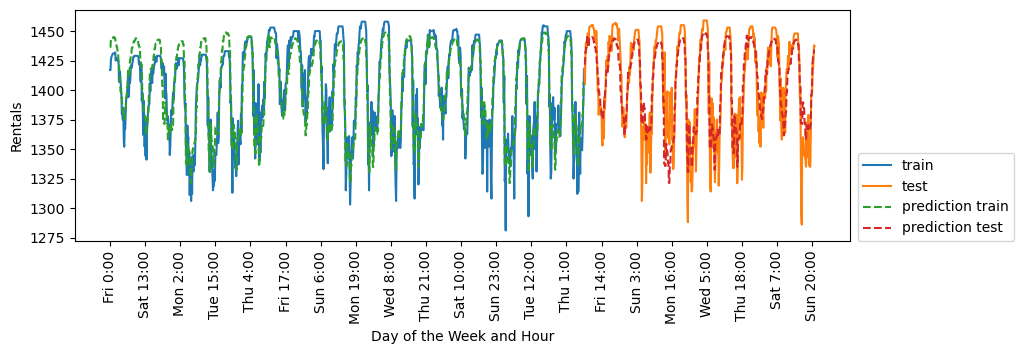

In [142]:
X_day_hour_week = np.hstack([available_bikes_series_22.index.dayofweek.values.reshape(-1, 1), available_bikes_series_22.index.hour.values.reshape(-1, 1)])

eval_on_features(X_day_hour_week, y, regressor)

Test-set R^2: 0.16


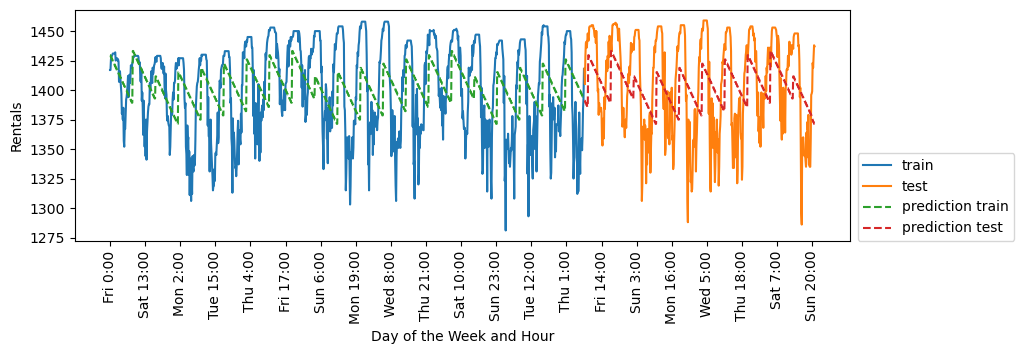

In [143]:
from sklearn.linear_model import LinearRegression

eval_on_features(X_day_hour_week, y, LinearRegression())

In [144]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

X_day_hour_week_onehot = enc.fit_transform(X_day_hour_week).toarray()

X_day_hour_week_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [145]:
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    plt.figure(figsize=(10, 3))

    plt.xticks(ticks=np.arange(0, len(features), len(features)//20))

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")

    plt.legend(loc=(1.01, 0))
    plt.xlabel("Data Points")
    plt.ylabel("Rentals")
    plt.title("Model Performance on Bike Rentals")



Test-set R^2: 0.74


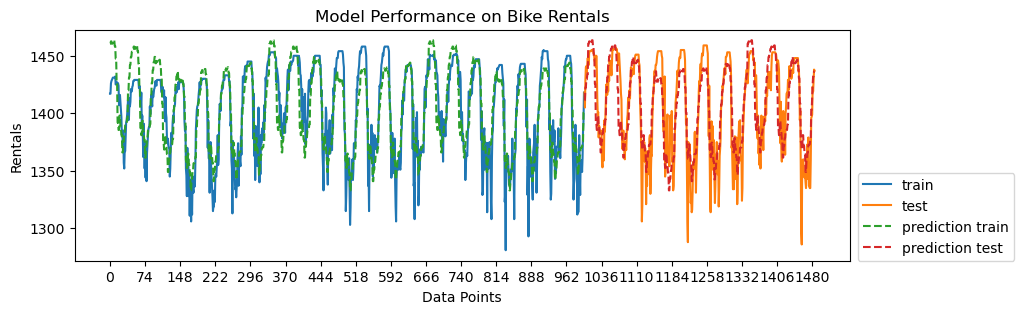

In [146]:
from sklearn.linear_model import LinearRegression

eval_on_features(X_day_hour_week_onehot, y, LinearRegression())